# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [63]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = ("Resources/city_data.csv")
ride_data_to_load = ("Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [34]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5740000000000,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2340000000000,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2010000000000,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5150000000000,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3910000000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [35]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby("type").count()["ride_id"]
total_rides_by_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [36]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [37]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [38]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares_by_type / total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [39]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [40]:
#  6. Create a PyBer summary DataFrame. 
df = {'type':['Rural', 'Suburban', 'Urban'],
    'Total Rides':[125, 625, 1625],
     'Total Drivers': [78, 490, 2405],
     'Total Fares': [4327.93, 19356.33, 39854.38],
     'Average Fare per Ride': [34.623440, 30.970128, 24.525772],
     'Average Fare per Driver': [55.486282, 39.502714, 16.571468]}
pyber_summary_df = pd.DataFrame(df)
pyber_summary_df = pyber_summary_df.set_index("type")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [41]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [42]:
#  8. Format the columns.
pyber_summary_df.style.format({'Average Fare per Ride': '${:.2f}', 
                               'Average Fare per Driver': '${:.2f}', 
                              'Total Fares': '${:,}',
                              'Total Drivers': '{0:,.0f}',
                              'Total Rides': '{0:,.0f}'})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [43]:
# 1. Read the merged DataFrame
pyber_data_df.to_csv('pyber_data.csv')
pyber_data_to_load = ("Resources/pyber_data.csv")
pyber_data = pd.read_csv(pyber_data_to_load)
pyber_data_df= pyber_data.copy()

In [44]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fares_by_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
total_fares_by_date

type   date            
Rural  2019-01-01 9:45     43.69
       2019-01-02 11:18    52.12
       2019-01-03 19:51    19.90
       2019-01-04 3:31     24.88
       2019-01-06 7:38     47.33
                           ...  
Urban  2019-05-08 1:54     32.69
       2019-05-08 2:31     41.33
       2019-05-08 4:20     21.99
       2019-05-08 4:39     18.45
       2019-05-08 7:29     18.55
Name: fare, Length: 2364, dtype: float64

In [45]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df


,index,Unnamed: 0.1,Unnamed: 0,city,date,fare,ride_id,driver_count,type
0,0,0,0,Lake Jonathanshire,2019-01-14 10:14,13.83,5740000000000,5,Urban
1,1,1,1,South Michelleport,2019-03-04 18:24,30.24,2340000000000,72,Urban
2,2,2,2,Port Samanthamouth,2019-02-24 4:29,33.44,2010000000000,57,Urban
3,3,3,3,Rodneyfort,2019-02-10 23:22,23.44,5150000000000,34,Urban
4,4,4,4,South Jack,2019-03-06 4:28,34.58,3910000000000,46,Urban
...,...,...,...,...,...,...,...,...,...
2370,2370,2370,2370,Michaelberg,2019-04-29 17:04,13.38,8550000000000,6,Rural
2371,2371,2371,2371,Lake Latoyabury,2019-01-30 0:05,20.76,9020000000000,2,Rural
2372,2372,2372,2372,North Jaime,2019-02-10 21:03,11.11,2780000000000,1,Rural
2373,2373,2373,2373,West Heather,2019-05-07 19:22,44.94,4260000000000,4,Rural


In [46]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
table = pd.pivot_table(pyber_data_df, values= 'fare', columns='type', index='date')
table

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [52]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
given_dates = table.loc['2019-01-01':'2019-04-29']

In [56]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
given_dates.index = pd.to_datetime(given_dates.index)
given_dates

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [54]:
# 7. Check that the datatype for the index is datetime using df.info()
given_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [65]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
given_dates_week = given_dates.resample("W").sum()
given_dates_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


In [64]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

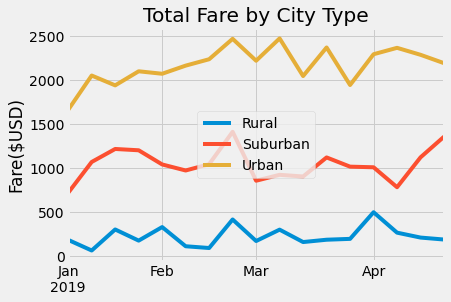

In [91]:
given_dates_week.plot()
plt.ylabel("Fare($USD)")
plt.xlabel("")
plt.title("Total Fare by City Type")
plt.legend(loc='center')
plt.savefig('Pyber_fare_summary.png')
plt.show()